In [1]:
from ParticleSwarmOptimization import WithNeighborsPSO
from ParticleSwarmOptimization import StandardPSO

In [2]:
from jmetal.problem.singleobjective.unconstrained import Rastrigin
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.util.archive import CrowdingDistanceArchive

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [4]:
phi_ns = [0, 0.1, 0.3, 0.5, 0.8, 1.0]
repetitions = 10
max_evaluations = 10000
swarm_size = 100
dimensions = 50
problem = Rastrigin(dimensions)

In [13]:
data = []
for phi_n in phi_ns:
    for i in range(repetitions):
        algorithm = WithNeighborsPSO(
            problem=Rastrigin(50),
            swarm_size=swarm_size,
            leaders=CrowdingDistanceArchive(100),
            termination_criterion=StoppingByEvaluations(max_evaluations),
            phi_n=phi_n,
            n_neighbors=5
        )
        algorithm.run()
        solutions = algorithm.get_result()
        objective = solutions[0].objectives[0]
        run_data = {
            'phi_n': phi_n,
            'result': objective
        }
        data.append(run_data)

In [14]:
df = pd.DataFrame.from_records(data=data, columns=data[0].keys())

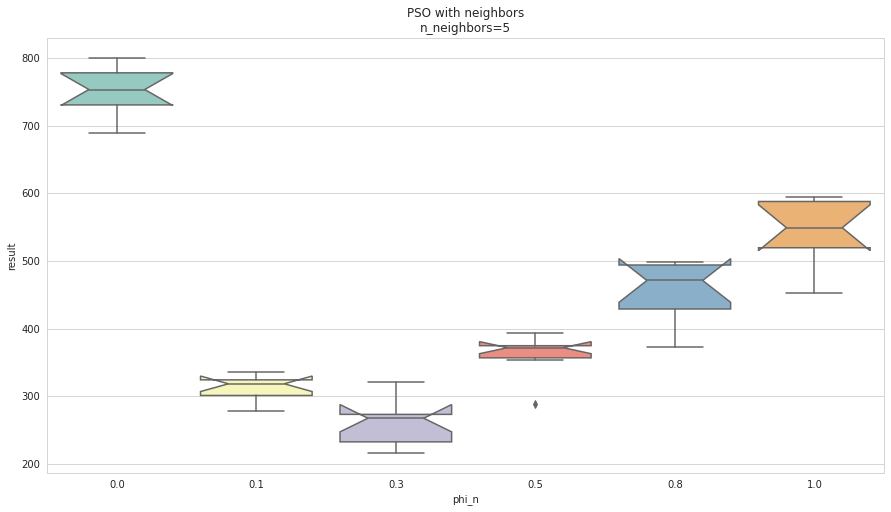

In [15]:
plt.figure(figsize=(15,8))
plt.title('PSO with neighbors\nn_neighbors=5')
sns.set_style('whitegrid')
ax = sns.boxplot(x='phi_n', y='result', data=df, palette='Set3', notch=True)

In [8]:
ns_neighbors = [3, 5, 10, 30, 50]

In [9]:
data = []
for n_neighbors in ns_neighbors:
    for i in range(repetitions):
        algorithm = WithNeighborsPSO(
            problem=Rastrigin(50),
            swarm_size=swarm_size,
            leaders=CrowdingDistanceArchive(100),
            termination_criterion=StoppingByEvaluations(max_evaluations),
            n_neighbors=n_neighbors,
            phi_n=0.3
        )
        algorithm.run()
        solutions = algorithm.get_result()
        objective = solutions[0].objectives[0]
        run_data = {
            'n_neighbors': n_neighbors,
            'result': objective
        }
        data.append(run_data)


In [10]:
df = pd.DataFrame.from_records(data=data, columns=data[0].keys())

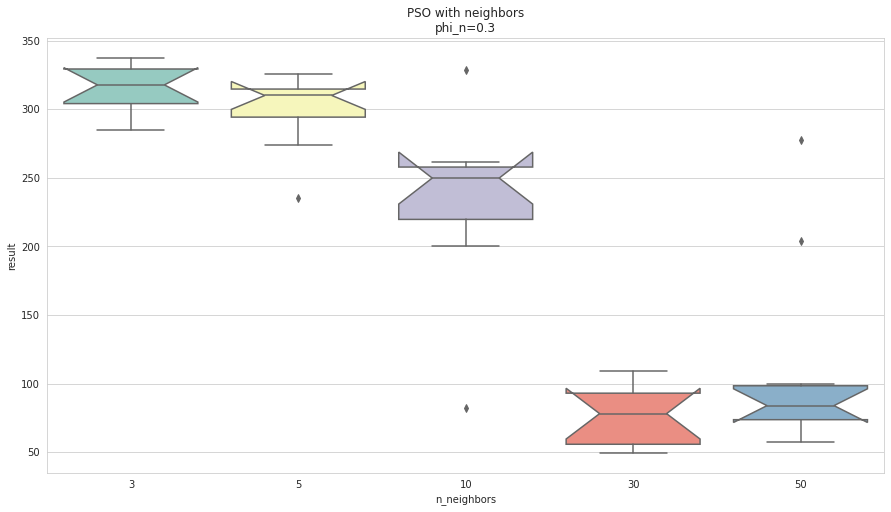

In [12]:
plt.figure(figsize=(15,8))
plt.title('PSO with neighbors\nphi_n=0.3')
sns.set_style('whitegrid')
ax = sns.boxplot(x='n_neighbors', y='result', data=df, palette='Set3', notch=True)

In [17]:
# Comparison with the StandardPSO.
from time import time

In [36]:
data = []

for i in range(repetitions):
    algorithm = WithNeighborsPSO(
        problem=Rastrigin(100),
        swarm_size=swarm_size,
        leaders=CrowdingDistanceArchive(100),
        termination_criterion=StoppingByEvaluations(max_evaluations),
        n_neighbors=30,
        phi_n=0.3
    )
    tic = time()
    algorithm.run()
    toc = time()
    solutions = algorithm.get_result()
    objective = solutions[0].objectives[0]
    run_data = {
        'method': 'neighbors',
        'result': objective,
        'time': toc - tic
    }
    data.append(run_data)

In [37]:
org_alg_data = []

for i in range(repetitions):
    algorithm = StandardPSO(
        problem=Rastrigin(100),
        swarm_size=swarm_size,
        leaders=CrowdingDistanceArchive(100),
        termination_criterion=StoppingByEvaluations(max_evaluations),
    )
    tic = time()
    algorithm.run()
    toc = time()
    solutions = algorithm.get_result()
    objective = solutions[0].objectives[0]
    run_data = {
        'method': 'standard',
        'result': objective,
        'time': toc - tic
    }
    org_alg_data.append(run_data)

In [38]:
from jmetal.algorithm.multiobjective.smpso import SMPSO
from jmetal.operator import PolynomialMutation

smpso_data = []

for i in range(repetitions):
    algorithm = SMPSO(
        problem=Rastrigin(100),
        swarm_size=swarm_size,
        mutation=PolynomialMutation(probability=1.0 / 50, distribution_index=20),
        leaders=CrowdingDistanceArchive(100),
        termination_criterion=StoppingByEvaluations(max_evaluations),
    )
    tic = time()
    algorithm.run()
    toc = time()
    solutions = algorithm.get_result()
    objective = solutions[0].objectives[0]
    run_data = {
        'method': 'smpso',
        'result': objective,
        'time': toc - tic
    }
    smpso_data.append(run_data)

In [39]:
df = pd.DataFrame.from_records(data=data, columns=data[0].keys())
df2 = pd.DataFrame.from_records(data=org_alg_data, columns=org_alg_data[0].keys())
df3 = pd.DataFrame.from_records(data=smpso_data, columns=smpso_data[0].keys())

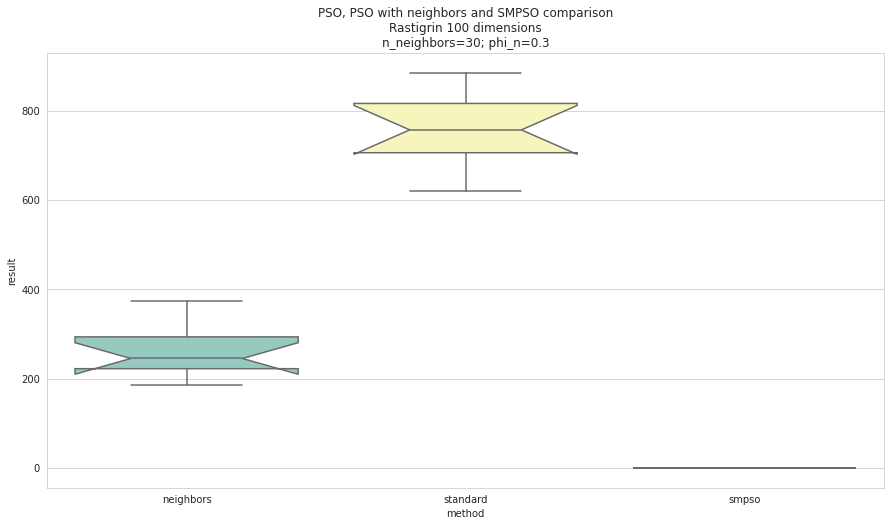

In [40]:
plt.figure(figsize=(15,8))
plt.title('PSO, PSO with neighbors and SMPSO comparison\nRastigrin 100 dimensions\nn_neighbors=30; phi_n=0.3')
sns.set_style('whitegrid')
ax = sns.boxplot(x='method', y='result', data=pd.concat([df, df2, df3]), palette='Set3', notch=True)

In [35]:
df['time'].mean(), df2['time'].mean(), df3['time'].mean()

(4.733572149276734, 1.8836178064346314, 2.174229860305786)

In [42]:
# --- Schwefel ---

In [43]:
from jmetal.core.problem import FloatProblem
from jmetal.core.solution import FloatSolution

In [44]:
import math
class Schwefel(FloatProblem):
    def __init__(self, number_of_variables: int = 10):
        super(Schwefel, self).__init__()
        self.number_of_objectives = 1
        self.number_of_variables = number_of_variables
        self.number_of_constraints = 0
        self.obj_directions = [self.MINIMIZE]
        self.obj_labels = ['f(x)']
        self.lower_bound = [-5.12 for _ in range(number_of_variables
        )]
        self.upper_bound = [5.12 for _ in range(number_of_variables)]
        FloatSolution.lower_bound = self.lower_bound
        FloatSolution.upper_bound = self.upper_bound


    def evaluate(self, solution: FloatSolution) -> FloatSolution:
        a = 418.9829
        result = a * solution.number_of_variables
        x = solution.variables
        for i in range(solution.number_of_variables):
            result -= x[i] * math.sin(math.sqrt(abs(x[i])))
        solution.objectives[0] = result
        return solution
 

    def get_name(self) -> str:
        return 'Schwefel'

In [67]:
data = []

for i in range(repetitions):
    algorithm = WithNeighborsPSO(
        problem=Schwefel(100),
        swarm_size=swarm_size,
        leaders=CrowdingDistanceArchive(100),
        termination_criterion=StoppingByEvaluations(max_evaluations),
        n_neighbors=30,
        phi_n=0.3
    )
    tic = time()
    algorithm.run()
    toc = time()
    solutions = algorithm.get_result()
    objective = solutions[0].objectives[0]
    run_data = {
        'method': 'neighbors',
        'result': objective,
        'time': toc - tic
    }
    data.append(run_data)

In [68]:
org_alg_data = []

for i in range(repetitions):
    algorithm = StandardPSO(
        problem=Schwefel(100),
        swarm_size=swarm_size,
        leaders=CrowdingDistanceArchive(100),
        termination_criterion=StoppingByEvaluations(max_evaluations),
    )
    tic = time()
    algorithm.run()
    toc = time()
    solutions = algorithm.get_result()
    objective = solutions[0].objectives[0]
    run_data = {
        'method': 'standard',
        'result': objective,
        'time': toc - tic
    }
    org_alg_data.append(run_data)

In [69]:
smpso_data = []

for i in range(repetitions):
    algorithm = SMPSO(
        problem=Schwefel(100),
        swarm_size=swarm_size,
        mutation=PolynomialMutation(probability=1.0 / 100, distribution_index=20),
        leaders=CrowdingDistanceArchive(100),
        termination_criterion=StoppingByEvaluations(max_evaluations),
    )
    tic = time()
    algorithm.run()
    toc = time()
    solutions = algorithm.get_result()
    objective = solutions[0].objectives[0]
    run_data = {
        'method': 'smpso',
        'result': objective,
        'time': toc - tic
    }
    smpso_data.append(run_data)

In [70]:
df = pd.DataFrame.from_records(data=data, columns=data[0].keys())
df2 = pd.DataFrame.from_records(data=org_alg_data, columns=org_alg_data[0].keys())
df3 = pd.DataFrame.from_records(data=smpso_data, columns=smpso_data[0].keys())

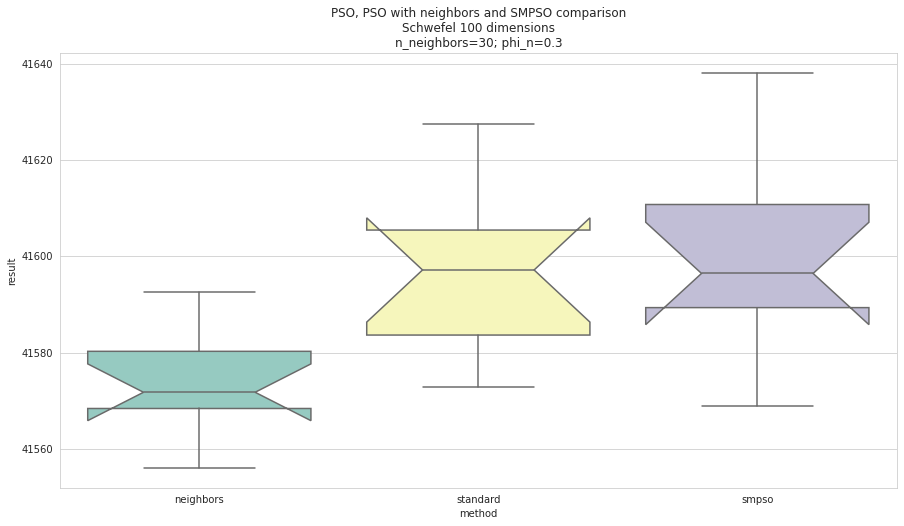

In [71]:
plt.figure(figsize=(15,8))
plt.title('PSO, PSO with neighbors and SMPSO comparison\nSchwefel 100 dimensions\nn_neighbors=30; phi_n=0.3')
sns.set_style('whitegrid')
ax = sns.boxplot(x='method', y='result', data=pd.concat([df, df2, df3]), palette='Set3', notch=True)

In [52]:
# --- Ackleys ---

In [53]:
def ackleys(xs):
    n_inverse = 1.0 / len(xs)
    sum_of_squares = 0
    sum_of_cosines = 0
    for x in xs:
        sum_of_squares += x * x
        sum_of_cosines += math.cos(2 * math.pi * x)
    result = (-20.0 * math.exp(-0.2 * math.sqrt(n_inverse * sum_of_squares))
              - math.exp(n_inverse * sum_of_cosines)
              + 20 + math.exp(1))
    return result

In [57]:
class Ackley(FloatProblem):
    def __init__(self, number_of_variables: int = 10):
        super(Ackley, self).__init__()
        self.number_of_objectives = 1
        self.number_of_variables = number_of_variables
        self.number_of_constraints = 0
        self.obj_directions = [self.MINIMIZE]
        self.obj_labels = ['f(x)']
        self.lower_bound = [-5.12 for _ in range(number_of_variables
        )]
        self.upper_bound = [5.12 for _ in range(number_of_variables)]
        FloatSolution.lower_bound = self.lower_bound
        FloatSolution.upper_bound = self.upper_bound


    def evaluate(self, solution: FloatSolution) -> FloatSolution:
        x = solution.variables
        result = ackleys(x)
        solution.objectives[0] = result
        return solution
 

    def get_name(self) -> str:
        return 'Ackley'

In [58]:
data = []

for i in range(repetitions):
    algorithm = WithNeighborsPSO(
        problem=Ackley(100),
        swarm_size=swarm_size,
        leaders=CrowdingDistanceArchive(100),
        termination_criterion=StoppingByEvaluations(max_evaluations),
        n_neighbors=30,
        phi_n=0.3
    )
    tic = time()
    algorithm.run()
    toc = time()
    solutions = algorithm.get_result()
    objective = solutions[0].objectives[0]
    run_data = {
        'method': 'neighbors',
        'result': objective,
        'time': toc - tic
    }
    data.append(run_data)

In [62]:
ackleys(solutions[0].variables)

2.329000631616378

In [63]:
org_alg_data = []

for i in range(repetitions):
    algorithm = StandardPSO(
        problem=Ackley(100),
        swarm_size=swarm_size,
        leaders=CrowdingDistanceArchive(100),
        termination_criterion=StoppingByEvaluations(max_evaluations),
    )
    tic = time()
    algorithm.run()
    toc = time()
    solutions = algorithm.get_result()
    objective = solutions[0].objectives[0]
    run_data = {
        'method': 'standard',
        'result': objective,
        'time': toc - tic
    }
    org_alg_data.append(run_data)

In [64]:
smpso_data = []

for i in range(repetitions):
    algorithm = SMPSO(
        problem=Ackley(100),
        swarm_size=swarm_size,
        mutation=PolynomialMutation(probability=1.0 / 50, distribution_index=20),
        leaders=CrowdingDistanceArchive(100),
        termination_criterion=StoppingByEvaluations(max_evaluations),
    )
    tic = time()
    algorithm.run()
    toc = time()
    solutions = algorithm.get_result()
    objective = solutions[0].objectives[0]
    run_data = {
        'method': 'smpso',
        'result': objective,
        'time': toc - tic
    }
    smpso_data.append(run_data)

In [65]:
df = pd.DataFrame.from_records(data=data, columns=data[0].keys())
df2 = pd.DataFrame.from_records(data=org_alg_data, columns=org_alg_data[0].keys())
df3 = pd.DataFrame.from_records(data=smpso_data, columns=smpso_data[0].keys())

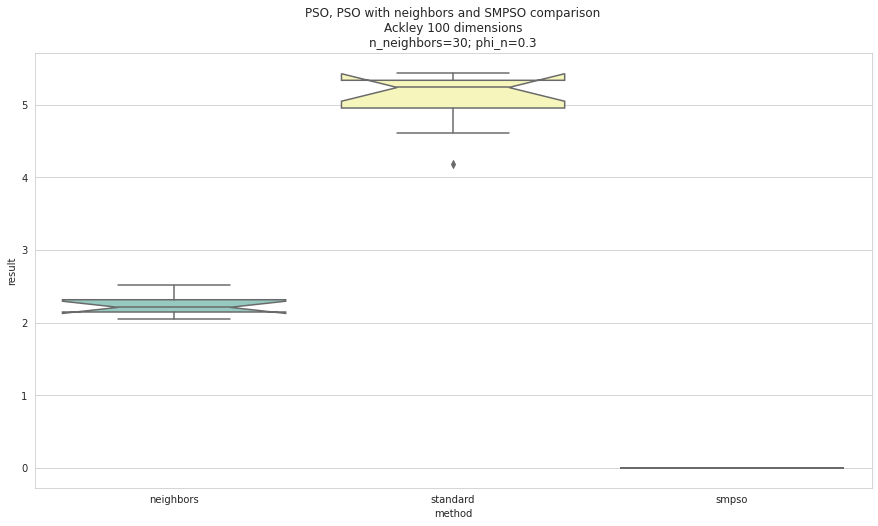

In [66]:
plt.figure(figsize=(15,8))
plt.title('PSO, PSO with neighbors and SMPSO comparison\nAckley 100 dimensions\nn_neighbors=30; phi_n=0.3')
sns.set_style('whitegrid')
ax = sns.boxplot(x='method', y='result', data=pd.concat([df, df2, df3]), palette='Set3', notch=True)